# 5. VAE Model

| Task                   | Sub-task                                | Comments                                  |
|------------------------|-----------------------------------------|-------------------------------------------|
| Data Preprocessing     | Scaling and Resizing                    | Done                                      |
| Model Trained          | Training Time?                         |     5 epochs in 188 seconds                                 |
|                        | Building Encoder and Decoder                     | Done                                      |
|                        | Creating VAE with VAE Loss                      | Done                                      |
| Images Generation       | 4 Images Generation           | Done                                      |


In [1]:
# libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K
from tensorflow.keras.preprocessing.image import load_img, img_to_array

2024-04-08 23:59:26.906737: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 23:59:26.906850: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 23:59:27.037898: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## 5.1. Data Preprocessing

In [2]:
# Prepare your dataset
data_dir = '/kaggle/input/face-expressions/dataset'
image_size = (64, 64)

In [3]:
# Load images
images = []
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    for file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file)
        img = load_img(image_path, target_size=image_size)
        img = img_to_array(img) / 255.0
        images.append(img)
images = np.array(images)

## 5.2. Model Building

In [4]:
# Define the VAE Model
latent_dim = 100

In [5]:
# Encoder
encoder_inputs = layers.Input(shape=image_size + (3,))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

In [6]:
# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

In [7]:
#  Decoder
decoder_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(8 * 8 * 64, activation='relu')(decoder_inputs)
x = layers.Reshape((8, 8, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, activation='sigmoid', strides=2, padding='same')(x)  # adjust strides

In [8]:
# Define VAE model
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
decoder = models.Model(decoder_inputs, decoder_outputs, name='decoder')

In [9]:
# Define the VAE
vae_outputs = decoder(encoder(encoder_inputs)[2])
vae = models.Model(encoder_inputs, vae_outputs, name='vae')

In [10]:
# Model Compilation
vae.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
# Training 1: Model Training for 20 epochs
vae.fit(images, images, epochs=20, batch_size=32)

Epoch 1/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 39s 75ms/step - loss: 0.6180
Epoch 2/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 37s 68ms/step - loss: 0.5516
Epoch 3/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - loss: 0.5436
Epoch 4/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - loss: 0.5413
Epoch 5/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 32s 67ms/step - loss: 0.5402
Epoch 6/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 32s 67ms/step - loss: 0.5380
Epoch 7/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - loss: 0.5377
Epoch 8/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - loss: 0.5372
Epoch 9/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - loss: 0.5369
Epoch 10/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - loss: 0.5368
Epoch 11/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 32s 67ms/step - loss: 0.5367
Epoch 12/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 32s 67ms/step - loss: 0.5353
Epoch 13/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 33s 67ms/step - loss: 0.5363
Epoch 14/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - loss: 0.5350
Epoch 15/20
483/483 ━━━━━━━━━

In [13]:
# Training 2: Model Training for 5 more epochs
vae.fit(images, images, epochs=5, batch_size=32)

Epoch 1/5
483/483 ━━━━━━━━━━━━━━━━━━━━ 33s 67ms/step - loss: 0.5350
Epoch 2/5
483/483 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - loss: 0.5344
Epoch 3/5
483/483 ━━━━━━━━━━━━━━━━━━━━ 33s 68ms/step - loss: 0.5351
Epoch 4/5
483/483 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - loss: 0.5351
Epoch 5/5
483/483 ━━━━━━━━━━━━━━━━━━━━ 40s 67ms/step - loss: 0.5356


## 5.3. Images Generation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


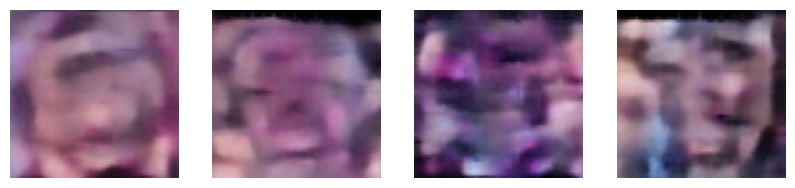

In [14]:
# Generate Images
def generate_images(n=4):
    latent_points = np.random.normal(size=(n, latent_dim))
    generated_images = decoder.predict(latent_points)
    plt.figure(figsize=(10, 10))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(generated_images[i])
        plt.axis('off')
    plt.show()

generate_images()

In [15]:
# saving model
decoder.save("vae_decoder.h5")